In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
import yfinance as yf

# 야후에서 데이터를 획득하는 방식이 크롤링으로 변경되어 주가 데이터를 불러옵니다.
yf.pdr_override()

In [4]:
now = datetime.now()
before = now - relativedelta(years=10)

now_day = now.strftime("%Y-%m-%d")
before_day = before.strftime("%Y-%m-%d")
print(f'end:{now_day}')
print(f'start:{before_day}')

samsung_stock = pdr.get_data_yahoo("005930.KS", start=before_day, end=now_day)
print(samsung_stock)

[*********************100%%**********************]  1 of 1 completed

end:2024-05-08
start:2014-05-08
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2014-05-08  27100.0  27100.0  26880.0  27000.0  21354.966797  16281900
2014-05-09  27120.0  27160.0  26520.0  26700.0  21117.685547  13157050
2014-05-12  26720.0  27900.0  26640.0  27760.0  21956.070312  15944800
2014-05-13  27760.0  28500.0  27760.0  28000.0  22145.888672  12107400
2014-05-14  28180.0  28300.0  28020.0  28300.0  22383.175781  11103750
...             ...      ...      ...      ...           ...       ...
2024-04-29  77400.0  77600.0  76200.0  76700.0  76700.000000  14664474
2024-04-30  77000.0  78500.0  76600.0  77500.0  77500.000000  19007007
2024-05-02  77600.0  78600.0  77300.0  78000.0  78000.000000  18900640
2024-05-03  79000.0  79000.0  77500.0  77600.0  77600.000000  13151889
2024-05-07  79600.0  81300.0  79400.0  81300.0  81300.000000  26238868

[2456 rows x 6 columns]


In [5]:
close_prices = samsung_stock['Close'].values
print(close_prices)

windown_size = 30

result_list = []
for i in range(len(close_prices) - (windown_size + 1)):
    result_list.append(close_prices[i: i+(windown_size+1)])

normal_data = []
for window in result_list:
    window_list = [((float(p) / float(window[0])) - 1) for p in window]
    normal_data.append(window_list)

result_list = np.array(normal_data)
print(result_list.shape[0], result_list.shape[1])

[27000. 26700. 27760. ... 78000. 77600. 81300.]
2425 31


In [6]:
row = int(round(result_list.shape[0] * 0.9))
train = result_list[:row, :]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result_list[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result_list[row:, -1]

x_train.shape, x_test.shape

((2182, 30, 1), (243, 30, 1))

In [7]:
row = int(round(result_list.shape[0] * 0.9))
train = result_list[:row, :]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result_list[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result_list[row:, -1]

x_train.shape, x_test.shape

((2182, 30, 1), (243, 30, 1))

In [8]:
model = Sequential()
model.add(LSTM(windown_size, return_sequences=True, input_shape=(windown_size, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24320     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 28225 (110.25 KB)
Trainable params: 28225 (110.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=10)

model.save(r'\39_predict\samsung.h5')


Epoch 1/10
219/219 [==============================] - 13s 36ms/step - loss: 0.0015 - val_loss: 7.2233e-04
Epoch 2/10
219/219 [==============================] - 7s 30ms/step - loss: 8.8935e-04 - val_loss: 6.6513e-04
Epoch 3/10
219/219 [==============================] - 7s 30ms/step - loss: 7.7293e-04 - val_loss: 6.4229e-04
Epoch 4/10
219/219 [==============================] - 7s 31ms/step - loss: 7.1348e-04 - val_loss: 8.2211e-04
Epoch 5/10
219/219 [==============================] - 7s 32ms/step - loss: 6.6292e-04 - val_loss: 7.9110e-04
Epoch 6/10
219/219 [==============================] - 7s 33ms/step - loss: 6.2093e-04 - val_loss: 7.7337e-04
Epoch 7/10
219/219 [==============================] - 7s 33ms/step - loss: 5.9040e-04 - val_loss: 4.2851e-04
Epoch 8/10
219/219 [==============================] - 6s 29ms/step - loss: 5.7580e-04 - val_loss: 3.6586e-04
Epoch 9/10
219/219 [==============================] - 7s 31ms/step - loss: 5.4835e-04 - val_loss: 4.0251e-04
Epoch 10/10
219/219 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 2s 18ms/step


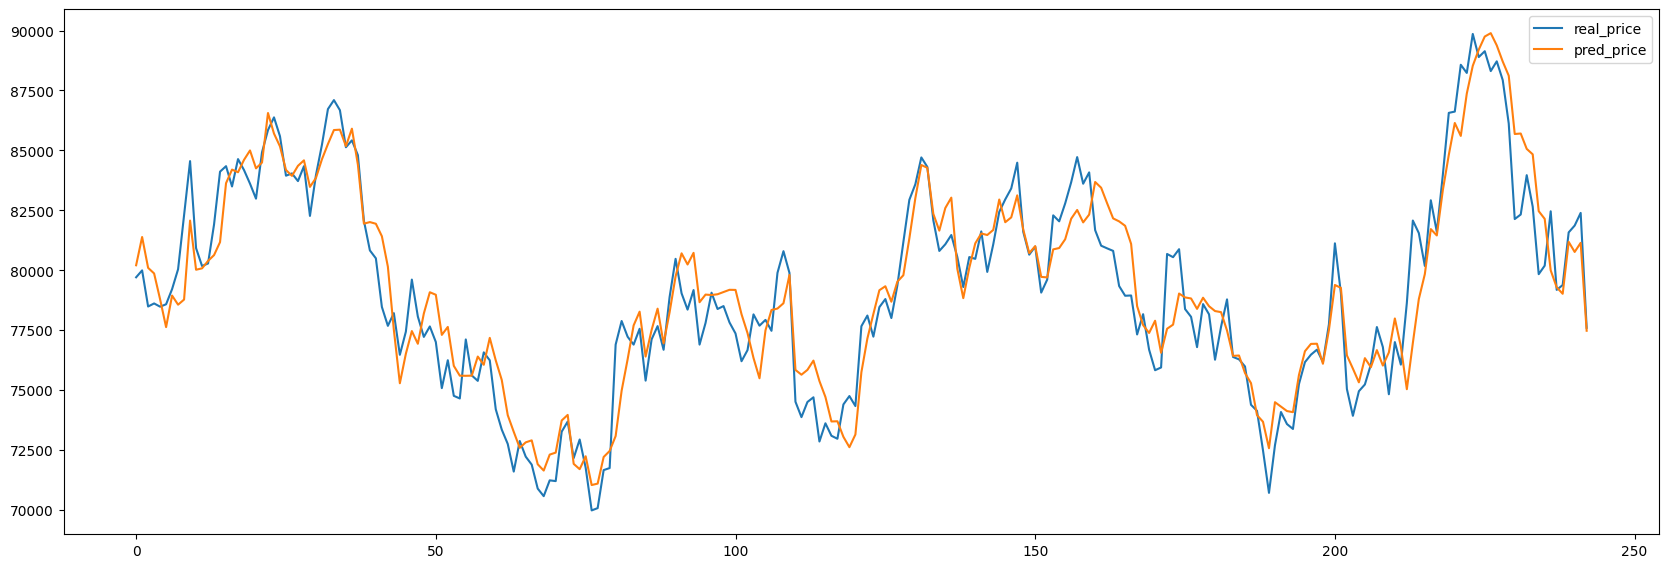

In [10]:
pred = model.predict(x_test)

pred_price = []
for i in pred:
    pred_price.append((i+1)*window[0])

real_price = []
for i in y_test:
    real_price.append((i+1)*window[0])

fig = plt.figure(facecolor='white', figsize=(70, 15))
ax = fig.add_subplot(234)
ax.plot(real_price, label='real_price')
ax.plot(pred_price, label='pred_price')
ax.legend()
plt.show()